In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
import random

In [3]:
#cases = ['a', 'a', 'b', 'b', 'c', 'c']
cases = ['a'] * 10 + ['b'] * 10 + ['c'] * 10 + ['d']*10 + ['e']*10 + ['f']*10 + ['g']*10 + ['h']*10 + ['i']*10 + ['j']*10
cases = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']
cases *= 10

In [4]:
print(len(cases))

100


In [5]:
def make_question():
    c = random.choice(list(set(cases)))
    return "is this image {}".format(c), c

def pick_case(cases):
    return random.choice(cases)

In [6]:
make_question()

('is this image i', 'i')

In [7]:
answers = []
def simulate_ape(strategy='guess'):
    correct = 0
    for n in range(30):
        text, choice = make_question()
        true_label = pick_case(cases)
        # guess
        if strategy == 'guess':
            if random.random() > 0.5:
                choice = "!" + choice
            else:
                choice = ' ' + choice

        # always say no
        elif strategy == 'no':
            choice = "!" + choice
        
        # always say yes to drugs
        elif strategy == 'yes':
            choice = ' ' + choice

        #print(choice, true_label, '->', end=' ')

        if "!" in choice:
            if choice[1] != true_label:
                #print('C')
                correct += 1
            else:
                #print('W')
                pass
        else:
            if choice[1] == true_label:
                #print('C')
                correct += 1
            else:
                #print('W')
                pass
        
        answers.append(choice)
        
    return correct

In [8]:
simulate_ape('no')

27

2.995


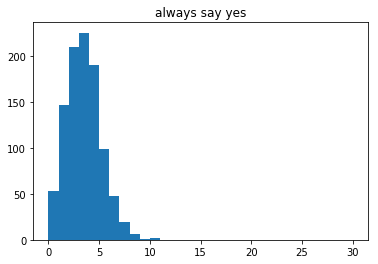

In [9]:
corrects = []
for n in range(1000):
    corrects.append(simulate_ape('yes'))
print(sum(corrects) / len(corrects))
plt.hist(corrects, range=(0, 30), bins=30)
plt.title('always say yes')

27.115


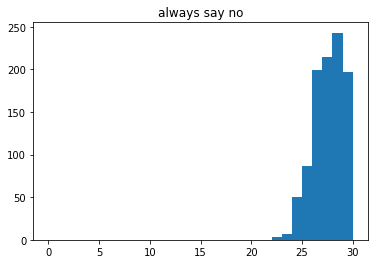

In [10]:
corrects = []
for n in range(1000):
    corrects.append(simulate_ape('no'))
print(sum(corrects) / len(corrects))
plt.hist(corrects, range=(0, 30), bins=30)
plt.title('always say no')

14.97


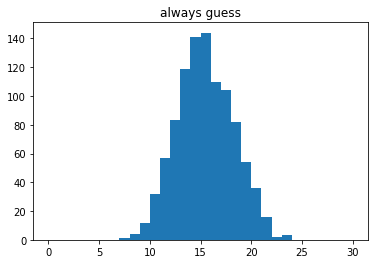

In [11]:
corrects = []
for n in range(1000):
    corrects.append(simulate_ape('guess'))
print(sum(corrects) / len(corrects))
plt.hist(corrects, range=(0, 30), bins=30)
plt.title('always guess')